In [1193]:
import torch
import torch.nn as nn     
import torch.nn.functional as F

In [1194]:
#model class
class Model(nn.Module):
    def __init__(self,in_features=3,h1=8,h2=8,out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [1195]:
#creating a seed
torch.manual_seed(45)
model = Model()

In [1196]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1197]:
filepath = r"D:\College\aitopia\hardcoded_dataset.csv";
df = pd.read_csv(filepath)
df.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Fire Present
0,28.021716,48.205845,14.440718,0
1,28.263659,40.962744,11.130209,0
2,25.529208,54.742351,12.117994,0
3,27.339049,59.242380,6.471412,0
4,29.210506,69.555798,8.001043,0


In [1198]:
x = df.drop('Fire Present',axis=1)
y = df['Fire Present']
x = x.to_numpy()
y=y.to_numpy()

In [1199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [1200]:
# x_train = x_train.to(torch.float32)
# x_test = x_test.to(torch.float32)
# y_train = y_train.to(torch.long)  # For classification labels
# y_test = y_test.to(torch.long)

# Convert NumPy arrays to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [1201]:
#set criteria to measure the error
criterion = nn.CrossEntropyLoss()
#choose adam optimizier,learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [1202]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=3, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=2, bias=True)
)>

In [1203]:
#training the model
#epochs how many??
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train) #trying to get predicted resul t from the forward function
    loss = criterion(y_pred,y_train) #comparing the predicted vs actual value

    losses.append(loss.detach().numpy())

    #printing every 10 epochs so 10 values

    if i%10 ==0:
        print(f'Epoch: {i} and loss: {loss}')

    #back propagation
    #fine tuning the weights

    optimizer.zero_grad()
    loss.backward()
    #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)   #remove later
    optimizer.step()


Epoch: 0 and loss: 0.6139636039733887
Epoch: 10 and loss: 0.39808228611946106
Epoch: 20 and loss: 0.3407125473022461
Epoch: 30 and loss: 0.2915118634700775
Epoch: 40 and loss: 0.25057709217071533
Epoch: 50 and loss: 0.216701939702034
Epoch: 60 and loss: 0.18873825669288635
Epoch: 70 and loss: 0.16560454666614532
Epoch: 80 and loss: 0.1463710516691208
Epoch: 90 and loss: 0.1302754282951355
Epoch: 100 and loss: 0.1167077124118805
Epoch: 110 and loss: 0.10518550872802734
Epoch: 120 and loss: 0.09532817453145981
Epoch: 130 and loss: 0.08683531731367111
Epoch: 140 and loss: 0.0794687420129776
Epoch: 150 and loss: 0.0730385035276413
Epoch: 160 and loss: 0.06739223003387451
Epoch: 170 and loss: 0.062406908720731735
Epoch: 180 and loss: 0.05798229202628136
Epoch: 190 and loss: 0.054036471992731094


Text(0.5, 0, 'epoch')

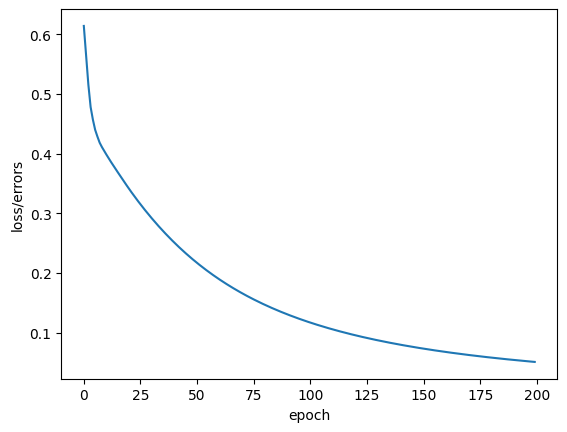

In [1204]:
#graphing

plt.plot(range(epochs),losses)
plt.ylabel("loss/errors")
plt.xlabel("epoch")

In [1205]:
with torch.no_grad():    #turning off back propagation
    y_eval = model.forward(x_test)    #x_testfeatures form test set y_eval are predictions
    loss = criterion(y_eval,y_test)

In [1206]:
loss

tensor(0.0518)

In [1207]:
correct=0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val=model.forward(data)
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')

        #correct or not
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(f'we got {correct} correct')

1.) tensor([ 1.3580, -1.2286]) 	 0 	0
2.) tensor([ 1.3580, -1.2286]) 	 0 	0
3.) tensor([-11.3619,  10.3690]) 	 1 	1
4.) tensor([ 1.3580, -1.2286]) 	 0 	0
5.) tensor([-10.1667,   9.5651]) 	 1 	1
6.) tensor([ 1.3580, -1.2286]) 	 0 	0
7.) tensor([ 1.3580, -1.2286]) 	 0 	0
8.) tensor([-15.3112,  13.7740]) 	 1 	1
9.) tensor([ 1.3580, -1.2286]) 	 0 	0
10.) tensor([-12.3856,  11.2608]) 	 1 	1
11.) tensor([-9.6770,  8.7502]) 	 1 	1
12.) tensor([ 1.3580, -1.2286]) 	 0 	0
13.) tensor([ 1.3580, -1.2286]) 	 0 	0
14.) tensor([ 1.3580, -1.2286]) 	 0 	0
15.) tensor([ 1.3580, -1.2286]) 	 0 	0
16.) tensor([-15.7293,  14.1617]) 	 1 	1
17.) tensor([ 1.3580, -1.2286]) 	 0 	0
18.) tensor([ 1.3580, -1.2286]) 	 0 	0
19.) tensor([ 1.3580, -1.2286]) 	 0 	0
20.) tensor([ 1.3580, -1.2286]) 	 0 	0
21.) tensor([ 1.3580, -1.2286]) 	 0 	0
22.) tensor([ 1.3580, -1.2286]) 	 0 	0
23.) tensor([-7.7106,  7.3278]) 	 1 	1
24.) tensor([-11.4249,  10.3196]) 	 1 	1
25.) tensor([ 1.3580, -1.2286]) 	 0 	0
26.) tensor([ 1.3580, 

In [1208]:
#checking new data

# new_data = torch.tensor([70,5.37])
# with torch.no_grad():
#     print(model(new_data))

In [1209]:
#save our NN model

torch.save(model.state_dict(),'fireTester.pt')

In [1210]:
# # Model class definition
# class Model(torch.nn.Module):
#     def __init__(self, in_features=3, h1=8, h2=8, out_features=2):
#         super().__init__()
#         self.fc1 = torch.nn.Linear(in_features, h1)
#         self.fc2 = torch.nn.Linear(h1, h2)
#         self.out = torch.nn.Linear(h2, out_features)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.out(x)
#         return x

# # Load the saved model
# new_model = Model()
# new_model.load_state_dict(torch.load('fireTester.pt'))
# new_model.eval()

# # Load the CSV file
# file_path = r"D:\College\aitopia\fnn model test data.csv";  # replace with your file path
# df = pd.read_csv(file_path)

# # Extract only the 3 features (x, y, z) from the CSV
# # For example, if the columns are 'Feature1', 'Feature2', 'Feature3' in the CSV:
# x_new = df[['temperature', 'windspeed', 'humidity']].to_numpy()

# # Convert the data to a PyTorch tensor
# x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

# # Make predictions for each row (sample) in the CSV
# with torch.no_grad():
#     predictions = new_model(x_new_tensor)

# # Output the predictions (get the predicted class for each sample)
# for i, pred in enumerate(predictions):
#     predicted_class = pred.argmax().item()  # Get the predicted class (0 or 1)
#     print(f"Sample {i + 1}: Predicted class: {predicted_class} (Fire = {predicted_class})")


